1. Подготовка данных.
1.1. Загрузите данные, и проделайте чистку/подготовку данных согласно коду ниже:

In [26]:
import pandas as pd

# Загрузка CSV-файла

In [27]:
df = pd.read_csv("Mall_Customers.csv")

# Удалим ID клиента и закодируем пол

In [28]:
df = df.drop("ID клиента", axis=1)
df["Пол"] = df["Пол"].map({"Male": 0, "Female": 1})
df.head()

Пол  Возраст  Годовой доход (в тыс. $)  Оценка расходов (1–100)
0    0       19                        15                       39
1    0       21                        15                       81
2    1       20                        16                        6
3    1       23                        16                       77
4    1       31                        17                       40

# 2. Контролируемое обучение (Supervised Learning)
**Задача: Предсказать категорию клиента (например, высокий или низкий доход)**

---


2.1. Создайте новый признак согласно коду ниже:



In [29]:
# Создадим бинарную метку
# Категоризация по доходу: больше 70 — высокий доход (1), иначе низкий (0)
df['Высокий доход'] = (df['Годовой доход (в тыс. $)'] > 70).astype(int)

2.2. Определите входные данные (X), и прогнозируемую переменную согласно коду ниже:

In [30]:
# Используем все признаки кроме дохода и метки
X = df.drop(['Годовой доход (в тыс. $)', 'Высокий доход'], axis=1)
y = df['Высокий доход']
X.head(5)


Пол  Возраст  Оценка расходов (1–100)
0    0       19                       39
1    0       21                       81
2    1       20                        6
3    1       23                       77
4    1       31                       40

In [31]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Высокий доход, dtype: int64

# 2.3. Разделите данные на тренировочную и тестовую выборки.

** Предобработка данных**
• Проверим пропущенные значения и основные статистики:

In [32]:
print(df.isnull().sum()) # Проверка пропущенных значений
print(df.describe()) # Основные статистики

Пол                         0
Возраст                     0
Годовой доход (в тыс. $)    0
Оценка расходов (1–100)     0
Высокий доход               0
dtype: int64
              Пол     Возраст  Годовой доход (в тыс. $)  \
count  200.000000  200.000000                200.000000   
mean     0.560000   38.850000                 60.560000   
std      0.497633   13.969007                 26.264721   
min      0.000000   18.000000                 15.000000   
25%      0.000000   28.750000                 41.500000   
50%      1.000000   36.000000                 61.500000   
75%      1.000000   49.000000                 78.000000   
max      1.000000   70.000000                137.000000   

       Оценка расходов (1–100)  Высокий доход  
count               200.000000     200.000000  
mean                 50.200000       0.370000  
std                  25.823522       0.484016  
min                   1.000000       0.000000  
25%                  34.750000       0.000000  
50%              

# 2.4. Обучите модель логистической регрессии (LogisticRegression) или дерево решений
**Логистическая регрессия (Logistic Regression)**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd # Ensure pandas is imported

# Ensure X is preprocessed correctly for the model
# Based on earlier steps and the error, 'Пол' is likely still strings and 'ID клиента' might be present
# Re-apply transformations to X if they weren't applied correctly upstream
if 'Пол' in X.columns and X['Пол'].dtype == 'object':
    X['Пол'] = X['Пол'].map({'Male': 0, 'Female': 1})

if 'ID клиента' in X.columns:
    X = X.drop('ID клиента', axis=1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Обучение модели
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

2.5. Оцените точность модели на тестовой выборке.

In [34]:
# Оценка точности
accuracy = model.score(X_test, y_test)
print(accuracy)

0.6166666666666667


# 2.6. Постройте confusion matrix (Матрица ошибок)
**Пример кода для бинарной классификации**


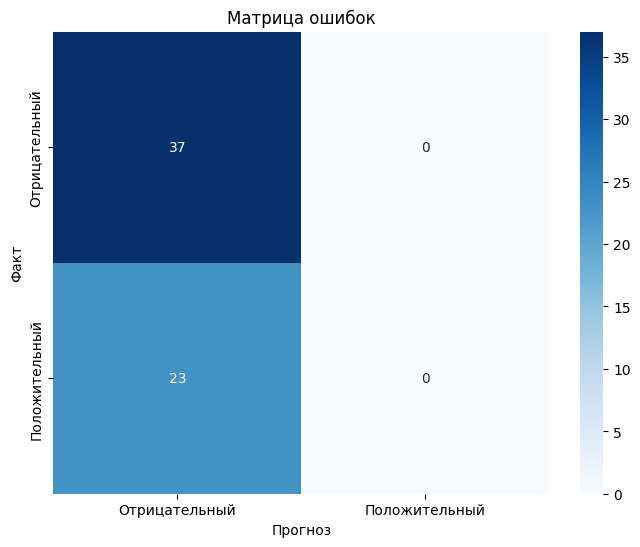

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Сделаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# 5. Визуализация матрицы ошибок (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Отрицательный', 'Положительный'],
yticklabels=['Отрицательный', 'Положительный'])
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.title('Матрица ошибок')
plt.show()



---



# 3. Неконтролируемое обучение (Unsupervised Learning)
**Задача: Кластеризация клиентов по доходу и уровню расходов**


**3.1. Выберите 2 признака для кластеризации согласно коду ниже:**

In [40]:
X = df[['Годовой доход (в тыс. $)', 'Оценка расходов (1–100)']]

**3.2. Проведите масштабирование признаков перед кластеризацией, согласно коду ниже:**



In [41]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = StandardScaler().fit_transform(X)

**3.3. Примените алгоритм K-Means для кластеризации данных.**

In [42]:
# Обучение K-means (4 кластера)
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
centroids = kmeans.cluster_centers_

**Реализация K-means в scikit-learn**


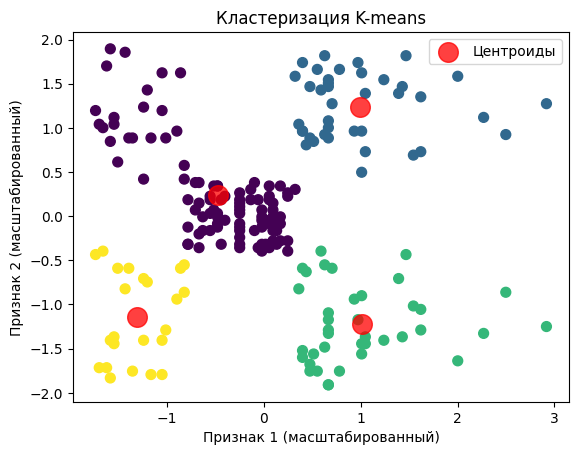

In [43]:
# Визуализация
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75,
label='Центроиды')
plt.title('Кластеризация K-means')
plt.xlabel('Признак 1 (масштабированный)')
plt.ylabel('Признак 2 (масштабированный)')
plt.legend()
plt.show()

**# 3.4. Попробуйте поэкспериментировать с разнымми значениями K и выбрать самое оптимальное значение с помощью Метода Локтя (Elbow Method). Нарисуйте график по Методу Локтя (Elbow Method).**

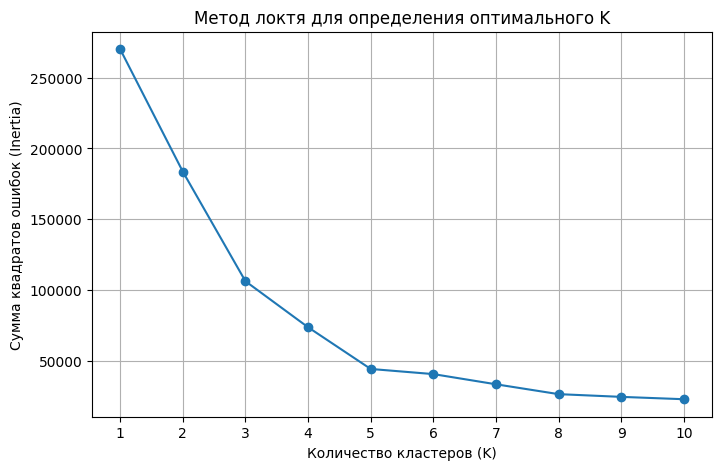

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Выбираем два признака для кластеризации
X = df[["Годовой доход (в тыс. $)", "Оценка расходов (1–100)"]]

# Рассчитаем значение инерции для K от 1 до 10
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Построим график метода локтя
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Метод локтя для определения оптимального K")
plt.xlabel("Количество кластеров (K)")
plt.ylabel("Сумма квадратов ошибок (Inertia)")
plt.grid(True)
plt.xticks(K_range)
plt.show()

Описание. На графике по методу локтя видно, что "излом" (elbow) происходит примерно на значении K = 5. Это означает, что оптимальное количество кластеров для сегментации клиентов по доходу и оценке расходов — 5.

**3.5. Сохраните спрогнозированные алгоритмом значения в переменной clusters.**

In [45]:
# Сохраняем метки кластеров в переменной clusters
clusters = kmeans.labels_

**3.6. Используйте следующий код для добавления кластеров в основной датасет в качестве новой колонки:**

In [46]:
df['Cluster'] = clusters

**3.7. Визуализируйте кластера с помощью следующего кода:**

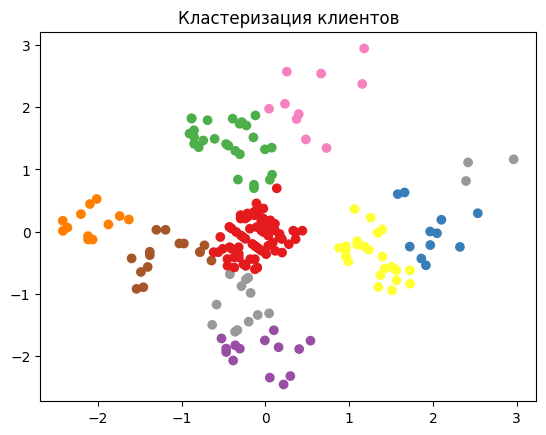

In [47]:
from sklearn.decomposition import PCA
# Визуализация
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1')
plt.title('Кластеризация клиентов')
plt.show()

# 4. Вопросы
4.1. В чём ключевое отличие между контролируемым и неконтролируемым обучением?

4.2. Что влияет на выбор количества кластеров в K-Means?

4.3. Для чего при визуализации кластеров использовался метод PCA?

4.1 Ответ.
Неконтролируемое обучение – это метод, при котором модель
обучается на неразмеченных данных, пытаясь выявить скрытые
структуры и зависимости.

Контролируемое обучение – это метод, при котором модель обучается
на размеченных данных. Каждому входному примеру соответствует
целевая переменная (метка), которую алгоритм пытается предсказать.

4.2 Ответ.
Методы оценки качества кластеризации.
**Метод локтя (Elbow method): ** Строится график зависимости внутрикластерной суммы квадратов ошибок (inertia) от числа кластеров. Ищется "излом" — точка, после которой уменьшение ошибки замедляется.

Распределение данных. Если данные визуализируемы, можно попытаться "увидеть" количество групп.

4.3
**Метод главных компонент** (Principal Component Analysis или же PCA) — алгоритм обучения без учителя, используемый для понижения размерности и выявления наиболее информативных признаков в данных.

Его суть заключается в предположении о линейности отношений данных и их
проекции на подпространство ортогональных векторов, в которых дисперсия будет максимальной.